### Get the data and do some prepocessing

In [1]:
import sys
sys.executable

'C:\\Users\\laksh\\anaconda3\\envs\\flower_env\\python.exe'

In [2]:
import numpy as np
import pandas as pd # use version==1.2.5 incase you want to run pandas profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
# Data is available at: https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# description of column names at: https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
            'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
            'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
            'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate']

num_col = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
                        'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
                        'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count',
                        'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                        'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                        'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [4]:
data_path = "../data/kddcup_data"

df = pd.read_csv(data_path, names=col_names+["threat_type"]) # threat type is the target

In [5]:
# do some preprocessing
# print(' ')
df['threat_type'] = df['threat_type'].str.replace('.', '', regex=True)

In [6]:
df['threat_type'].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [7]:
df['threat_type'].value_counts()

smurf              2807886
neptune            1072017
normal              972781
satan                15892
ipsweep              12481
portsweep            10413
nmap                  2316
back                  2203
warezclient           1020
teardrop               979
pod                    264
guess_passwd            53
buffer_overflow         30
land                    21
warezmaster             20
imap                    12
rootkit                 10
loadmodule               9
ftp_write                8
multihop                 7
phf                      4
perl                     3
spy                      2
Name: threat_type, dtype: int64

In [15]:
indexNames = df[(df['threat_type'] == 'spy') | (df['threat_type'] == 'perl') | (df['threat_type'] == 'phf') 
               | (df['threat_type'] == 'multihop') | (df['threat_type'] == 'ftp_write') | (df['threat_type'] == 'loadmodule') 
               | (df['threat_type'] == 'rootkit') | (df['threat_type'] == 'imap') | (df['threat_type'] == 'warezmaster') 
               | (df['threat_type'] == 'land') | (df['threat_type'] == 'buffer_overflow') | (df['threat_type'] == 'guess_passwd') 
               | (df['threat_type'] == 'pod') | (df['threat_type'] == 'teardrop')| (df['threat_type'] == 'warezclient') 
               | (df['threat_type'] == 'back') | (df['threat_type'] == 'nmap')].index
df.drop(indexNames , inplace=True)

In [16]:
df['threat_type'].value_counts()

smurf        2807886
neptune      1072017
normal        972781
satan          15892
ipsweep        12481
portsweep      10413
Name: threat_type, dtype: int64

https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669

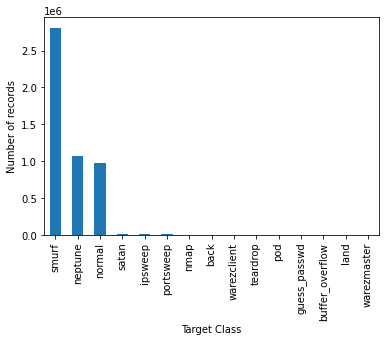

In [10]:

count = df['threat_type'].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [13]:
n_samples = count.median()#.astype(np.int64)
n_samples

2203.0

In [12]:
# 34 numerical columns are considered for training
num_df = df[num_col]

# Lets remove the numerical columns with constant value
X = num_df.loc[:, (num_df != num_df.iloc[0]).any()].values

In [13]:
# labelencode the target variable
threat_types = df["threat_type"].values
encoder = LabelEncoder()
# encoder = OneHotEncoder()
# use LabelEncoder to encode the threat types in numeric values
y = encoder.fit_transform(threat_types)
# print(' ')
# print("Shape of target vector is... : ",y.shape)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=13, stratify=y)

scaler = StandardScaler()  
a = scaler.fit(X_train)
X_train = a.transform(X_train)
X_test = scaler.transform(X_test)

# print(y_test)
print(len(np.unique(y_train)), len(np.unique(y_test)))
# unique, counts = np.unique(y_train, return_counts=True)
# unique1, counts1 = np.unique(y_test, return_counts=True)

unknwn1 = (np.array(np.unique(y_train, return_counts=True)).T)
unknwn2 = (np.array(np.unique(y_test, return_counts=True)).T)


23 22


In [15]:
print(unknwn1)
print(unknwn2)

[[      0    1762]
 [      1      24]
 [      2       6]
 [      3      42]
 [      4      10]
 [      5    9985]
 [      6      17]
 [      7       7]
 [      8       6]
 [      9  857614]
 [     10    1853]
 [     11  778225]
 [     12       2]
 [     13       3]
 [     14     211]
 [     15    8330]
 [     16       8]
 [     17   12714]
 [     18 2246308]
 [     19       2]
 [     20     783]
 [     21     816]
 [     22      16]]
[[     0    441]
 [     1      6]
 [     2      2]
 [     3     11]
 [     4      2]
 [     5   2496]
 [     6      4]
 [     7      2]
 [     8      1]
 [     9 214403]
 [    10    463]
 [    11 194556]
 [    12      1]
 [    13      1]
 [    14     53]
 [    15   2083]
 [    16      2]
 [    17   3178]
 [    18 561578]
 [    20    196]
 [    21    204]
 [    22      4]]


In [11]:
# Export as a csv

#num_df.to_csv('processed_KDD_cup.csv', index=False)